In [ ]:
import requests # 요청
from bs4 import BeautifulSoup # 문자열 HTML로 번역
import pandas as pd # 엑셀화

url = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%A1%9C%EB%98%90")
html = BeautifulSoup(url.text)
current = int(html.select('a._lotto-btn-current')[0].select('em')[0].text[:-1])

total = []

for n in range(1, current + 1):

  url = requests.get(f"https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%A1%9C%EB%98%90+{n}%ED%9A%8C")
  html = BeautifulSoup(url.text)

  numbers = html.select('div.num_box')[0].select('span.num')

  box = []

  for i in numbers:
    box.append(int(i.text))

  total.append(box)

  print('{}회 로또 데이터 저장완료 : {}'.format(n, box))

1회 로또 데이터 저장완료 : [10, 23, 29, 33, 37, 40, 16]
2회 로또 데이터 저장완료 : [9, 13, 21, 25, 32, 42, 2]
3회 로또 데이터 저장완료 : [11, 16, 19, 21, 27, 31, 30]
4회 로또 데이터 저장완료 : [14, 27, 30, 31, 40, 42, 2]
5회 로또 데이터 저장완료 : [16, 24, 29, 40, 41, 42, 3]
6회 로또 데이터 저장완료 : [14, 15, 26, 27, 40, 42, 34]
7회 로또 데이터 저장완료 : [2, 9, 16, 25, 26, 40, 42]
8회 로또 데이터 저장완료 : [8, 19, 25, 34, 37, 39, 9]
9회 로또 데이터 저장완료 : [2, 4, 16, 17, 36, 39, 14]
10회 로또 데이터 저장완료 : [9, 25, 30, 33, 41, 44, 6]
11회 로또 데이터 저장완료 : [1, 7, 36, 37, 41, 42, 14]
12회 로또 데이터 저장완료 : [2, 11, 21, 25, 39, 45, 44]
13회 로또 데이터 저장완료 : [22, 23, 25, 37, 38, 42, 26]
14회 로또 데이터 저장완료 : [2, 6, 12, 31, 33, 40, 15]
15회 로또 데이터 저장완료 : [3, 4, 16, 30, 31, 37, 13]
16회 로또 데이터 저장완료 : [6, 7, 24, 37, 38, 40, 33]
17회 로또 데이터 저장완료 : [3, 4, 9, 17, 32, 37, 1]
18회 로또 데이터 저장완료 : [3, 12, 13, 19, 32, 35, 29]
19회 로또 데이터 저장완료 : [6, 30, 38, 39, 40, 43, 26]
20회 로또 데이터 저장완료 : [10, 14, 18, 20, 23, 30, 41]
21회 로또 데이터 저장완료 : [6, 12, 17, 18, 31, 32, 21]
22회 로또 데이터 저장완료 : [4, 5, 6, 8, 17, 39, 25]
23회 로또 

KeyboardInterrupt: ignored

In [ ]:
from tqdm import tqdm # for문의 진행상황
import requests # 요청
from bs4 import BeautifulSoup # 문자열 HTML로 번역
import pandas as pd # 엑셀화

url = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C")
html = BeautifulSoup(url.text)
current = int(html.find('a', attrs={'class':'_lottery-btn-current'}).find('em').text.replace('회', ''))

total = []

for n in tqdm(range(1, current + 1)):

  url = requests.get(f"https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C+{n}%ED%9A%8C")
  html = BeautifulSoup(url.text)

  numbers = html.select('ul.win_num')[0].select('span')

  box = []

  for i in numbers:
    box.append(int(i.text[0]))

  total.append(box)

df = pd.DataFrame(total, columns=['조', '번호1', '번호2', '번호3', '번호4', '번호5', '번호6'])

box = []

for i in range(len(df)):
  box.append('{}회차'.format(i+1))

df.index = box

df.to_excel('result.xlsx')
df

100%|██████████| 59/59 [01:09<00:00,  1.18s/it]


In [ ]:
df = pd.DataFrame(total, columns=['조', '번호1', '번호2', '번호3', '번호4', '번호5', '번호6'])
df

,조,번호1,번호2,번호3,번호4,번호5,번호6
0,4,1,6,2,1,3,2
1,2,4,5,0,5,5,8
2,4,5,4,4,9,5,5
3,4,1,2,4,4,2,0
4,4,7,5,4,6,5,5
5,5,1,9,3,2,0,2
6,2,5,9,7,0,9,3
7,4,2,3,4,0,5,8
8,3,1,3,3,5,1,0
9,2,7,7,0,1,7,3


In [ ]:
url = requests.get('https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page=1')
html = BeautifulSoup(url.text)
kospi_page = int(html.select('td.pgRR')[0].select('a')[0]['href'][-2:])

kospi_box = []

for n in tqdm(range(1, kospi_page + 1)):

  url = requests.get(f'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page={n}')
  html = BeautifulSoup(url.text)

  table = html.select('table.type_2')[0]
  table = pd.read_html(str(table))[0]
  table = table[table['종목명'].notnull()]
  del table['토론실']
  del table['N']
  table['종류'] = ['KOSPI'] * len(table)
  kospi_box.append(table)

kospi = pd.concat(kospi_box, ignore_index=True) # 여러개의 표를 하나의 표로 합쳐주는 기능

# -- kosdaq // kospi + kosdaq 하나의 엑셀 파일 만들기

url = requests.get('https://finance.naver.com/sise/sise_market_sum.nhn?sosok=1&page=1')
html = BeautifulSoup(url.text)
kosdaq_page = int(html.select('td.pgRR')[0].select('a')[0]['href'][-2:])

kosdaq_box = []

for n in tqdm(range(1, kosdaq_page + 1)):

  url = requests.get(f'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=1&page={n}')
  html = BeautifulSoup(url.text)

  table = html.select('table.type_2')[0]
  table = pd.read_html(str(table))[0]
  table = table[table['종목명'].notnull()]
  del table['토론실']
  del table['N']
  table['종류'] = ['KOSDAQ'] * len(table)
  kosdaq_box.append(table)

kosdaq = pd.concat(kosdaq_box, ignore_index=True) # 여러개의 표를 하나의 표로 합쳐주는 기능

stock = pd.concat(kospi_box, ignore_index=True)
stock.to_excel('stock.xlsx', encoding='utf-8')
stock

 25%|██▌       | 8/32 [00:07<00:24,  1.00s/it]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 61%|██████▏   | 19/31 [00:17<00:11,  1.03it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 31/31 [00:28<00:00,  1.08it/s]


In [ ]:
stock = pd.concat([kospi, kosdaq], ignore_index=True)
stock.to_excel('stock.xlsx', encoding='euc-kr')
stock

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,종류
0,삼성전자,80000.0,100.0,+0.13%,100.0,4775826.0,5969783.0,53.66,9025430.0,19.21,9.99,KOSPI
1,SK하이닉스,122500.0,500.0,+0.41%,5000.0,891803.0,728002.0,49.36,1621094.0,17.50,9.53,KOSPI
2,카카오,159000.0,4000.0,+2.58%,100.0,705848.0,443930.0,32.77,4195446.0,231.44,2.70,KOSPI
3,NAVER,392000.0,5000.0,-1.26%,100.0,643912.0,164263.0,56.95,576238.0,3.99,15.22,KOSPI
4,삼성전자우,73800.0,300.0,+0.41%,100.0,607290.0,822887.0,76.49,561309.0,17.72,NaN,KOSPI
...,...,...,...,...,...,...,...,...,...,...,...,...
3089,이베스트이안스팩1호,2135.0,60.0,-2.73%,100.0,68.0,3200.0,0.02,206317.0,125.59,0.58,KOSDAQ
3090,케이프이에스제4호,2250.0,95.0,-4.05%,100.0,68.0,3009.0,0.50,124177.0,45.92,NaN,KOSDAQ
3091,에스제이케이,498.0,0.0,0.00%,500.0,66.0,13326.0,0.46,0.0,-0.46,-82.93,KOSDAQ
3092,스타모빌리티,505.0,0.0,0.00%,500.0,61.0,12072.0,4.28,0.0,-0.01,428.36,KOSDAQ


In [ ]:
url = requests.get('https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page=1')
html = BeautifulSoup(url.text)
kospi_page = int(html.select('td.pgRR')[0].select('a')[0]['href'][-2:])

kospi_box = []

for n in tqdm(range(1, kospi_page + 1)):
  url=requests.get(f'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page={n}')
  html = BeautifulSoup(url.text)

  table = html.select('table.type_2')[0]
  table = pd.read_html(str(table))[0]
  table = table[table['종목명'].notnull()]
  del table['토론실']
  del table['N']
  table['종류'] = ['KOSPI'] * len(table)
  kospi_box.append(table)
kospi = pd.concat(kospi_box, ignore_index=True)

url = requests.get('https://finance.naver.com/sise/sise_market_sum.nhn?sosok=1&page=1')
html = BeautifulSoup(url.text)
kosdaq_page = int(html.select('td.pgRR')[0].select('a')[0]['href'][-2:])

kosdaq_box = []
for n in tqdm(range(1, kosdaq_page + 1)):

  url=requests.get(f'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=1&page={n}')
  html = BeautifulSoup(url.text)

  table = html.select('table.type_2')[0]
  table = pd.read_html(str(table))[0]
  table = table[table['종목명'].notnull()]
  del table['토론실']
  del table['N']
  table['종류'] = ['KOSDAQ'] * len(table)
  kosdaq_box.append(table)
  
kosdaq = pd.concat(kosdaq_box, ignore_index=True)

stock = pd.concat([kospi, kosdaq], ignore_index=True)
stock

In [ ]:
url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%BD%94%EB%A1%9C%EB%82%98")
html = BeautifulSoup(url.text)

# 코로나 뉴스 기사 10개 제목 가져오기

for i in html.select('ul.list_news')[0].select('li.bx'):
  print(i.select)

<li class="bx" id="sp_nws1"> <div class="news_wrap api_ani_send"> <div class="news_area"> <div class="news_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://biz.chosun.com/distribution/food/2021/06/22/MRZUTNAXGFCR3EWSJLJCWMKV6M/?utm_source=naver&amp;utm_medium=original&amp;utm_campaign=biz" href="#" onclick="tCR('a=nws*h.kep&amp;r=1&amp;i=88127058_000000000000000000736346&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=nws*h.kepoff&amp;r=1&amp;i=88127058_000000000000000000736346&amp;u=javascript" data-cr-on="a=nws*h.kepon&amp;r=1&amp;i=88127058_000000000000000000736346&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a=nws*h.kephome&amp;r=1&amp;i=88127058_000000000000000

In [ ]:
import json

url = requests.get("https://project-team.upbit.com/api/v1/disclosure?region=kr&per_page=20")
data = json.loads(url.text)

for i in data['data']['posts']:
  print(i['text'])

[기공개] 리브랜딩 : 피체인(PCHAIN)이 플리안(Plian)으로 바뀝니다
어뷰징 물량 회수 및 소각 공시
RINGX 재단, 롯데슈퍼와 업무 제휴 협약 체결
베트남 기업 '마켓 사이공'에 블록체인 모빌리티 플랫폼 수출(SaaS)
[기공개] 카르테시 x Travala 파트너십 체결
[기공개] 엔진, 한국 최대 소셜 게이밍 플랫폼(겜톡톡)과 파트너십... 친환경 NFT 도입 예정
[기공개] 플레이댑, 루데나 프로토콜 NFT아이템 거래 지원 계약
[기공개] Bifrost PAID Network와 업무 협력 파트너쉽 체결
[기공개] 칠리즈, 맨체스터 시티 FC 파트너십 발표
[기공개] 토큰 액면 병합: NPXS가 PUNDIX로 바뀝니다.
[기공개] 크립토닷컴, 비자와 글로벌 파트너쉽 체결 및 주요 회원사로 선정
[기공개] 메디블록, 블록체인 기반의 DID 백신패스 출시 예정
[기공개] P2P 마켓플레이스 오리진 프로토콜 , NFT 및 OUSD 라이트페이퍼 출시
5조원 규모 초대형 북미 펀드인 Celsius Network에서 GOM2에 투자
인도네시아 기업 '퀵스'에 MVL 프로토콜 기반 모빌리티 서비스 플랫폼 수출(SaaS)
오브스(Orbs), 블록체인 기업 MOONSTAKE와 협업
쎄타랩스, 분산형 비디오 및 데이터 전송을 지원하기 위한 초고 트랜잭션 처리량 소액 결제에 대한 두번째 미국특허취득
픽션 네트워크, 신임 대표이사 선출
RINGX 재단, OK캐쉬백((주)위페이)과 ‘마이비(Mivy)’ 플랫폼 전환 협업 진행
토카막 다오 베타 출시


In [ ]:
# (csv) vs (tsv)

import pandas as pd

df = pd.read_csv("gapminder.tsv", sep = '\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [ ]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [ ]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [ ]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [ ]:
df[['country', 'year', 'pop']]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [ ]:
df.loc[0] # 이름

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [ ]:
df.iloc[0] # 위치

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [ ]:
df.iloc[-1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [ ]:
df.loc[[0, 100, 1000]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


In [ ]:
df.iloc[[0, 100, 1000]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


In [ ]:
df.loc[[0, 100, 1000], ['country', 'year']] # 이름

,country,year
0,Afghanistan,1952
100,Bangladesh,1972
1000,Mongolia,1972


In [ ]:
df.iloc[[0, 100, 1000], [0, 2]]

,country,year
0,Afghanistan,1952
100,Bangladesh,1972
1000,Mongolia,1972


In [ ]:
df.loc[:, ['year', 'pop']]

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460
...,...,...
1699,1987,9216418
1700,1992,10704340
1701,1997,11404948
1702,2002,11926563


In [ ]:
df.iloc[:, [0, 2]]

,country,year
0,Afghanistan,1952
1,Afghanistan,1957
2,Afghanistan,1962
3,Afghanistan,1967
4,Afghanistan,1972
...,...,...
1699,Zimbabwe,1987
1700,Zimbabwe,1992
1701,Zimbabwe,1997
1702,Zimbabwe,2002


In [ ]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
a = df.groupby('year')['lifeExp'].mean()
a

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

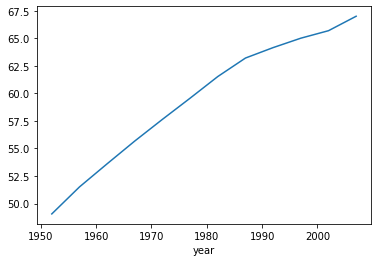

In [ ]:
a.plot()

In [ ]:
a = df.groupby(['year', 'continent'])['lifeExp'].mean()
a.to_excel('result.xlsx')
a

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

In [ ]:
a = df.groupby('continent')['country'].nunique()
a

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [ ]:
s = pd.Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [ ]:
a = pd.DataFrame({
    '이름' : ['곽경일', '장원영', '아이유'],
    '성별' : ['남자', '여자', '여자'],
    '나이' : [30, 18, 29]
})

a

,이름,성별,나이
0,곽경일,남자,30
1,장원영,여자,18
2,아이유,여자,29


In [ ]:
scientists = pd.read_csv("scientists.csv")
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [ ]:
age = scientists['Age']
age

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [ ]:
age.max()

90

In [ ]:
age.min()

37

In [ ]:
age.mean()

59.125

In [ ]:
age.median()

58.5

In [ ]:
age[age > age.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [ ]:
age > age.mean()

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool

In [ ]:
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [ ]:
scientists[age > age.mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [ ]:
age + age

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [ ]:
age * age

0    1369
1    3721
2    8100
3    4356
4    3136
5    2025
6    1681
7    5929
Name: Age, dtype: int64

In [ ]:
a = pd.Series([100, 100])
a

0    100
1    100
dtype: int64

In [ ]:
age + a

0    137.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

In [ ]:
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [ ]:
scientists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [ ]:
born_dt = pd.to_datetime(scientists['Born'], format = '%Y-%m-%d')
died_dt = pd.to_datetime(scientists['Died'], format = '%Y-%m-%d')

In [ ]:
born_dt

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [ ]:
scientists['Born'] = born_dt
scientists['Died'] = died_dt

In [ ]:
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [ ]:
scientists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      datetime64[ns]
 2   Died        8 non-null      datetime64[ns]
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 448.0+ bytes


In [ ]:
scientists['days'] = scientists['Died'] - scientists['Born']
scientists

,Name,Born,Died,Age,Occupation,days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,28422 days


In [ ]:
import seaborn as sns # 연습용데이터 + 가시화
import matplotlib.pyplot as plt # 그림 그리는 라이브러리

anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [ ]:
data1 = anscombe[anscombe['dataset'] == 'I']
data2 = anscombe[anscombe['dataset'] == 'II']
data3 = anscombe[anscombe['dataset'] == 'III']
data4 = anscombe[anscombe['dataset'] == 'IV']

In [ ]:
print(data1.mean())
print(data2.mean())
print(data3.mean())
print(data4.mean())

x    9.000000
y    7.500909
dtype: float64
x    9.000000
y    7.500909
dtype: float64
x    9.0
y    7.5
dtype: float64
x    9.000000
y    7.500909
dtype: float64


In [ ]:
print(data1.std())
print(data2.std())
print(data3.std())
print(data4.std())

x    3.316625
y    2.031568
dtype: float64
x    3.316625
y    2.031657
dtype: float64
x    3.316625
y    2.030424
dtype: float64
x    3.316625
y    2.030579
dtype: float64


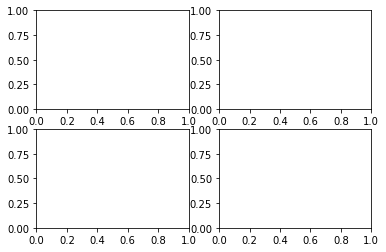

In [ ]:
fig = plt.figure() # 도화지

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

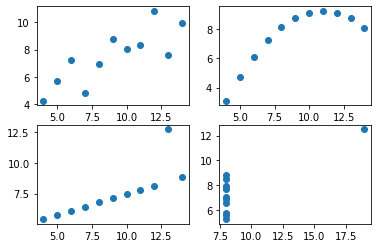

In [ ]:
ax1.scatter(data1['x'], data1['y'])
ax2.scatter(data2['x'], data2['y'])
ax3.scatter(data3['x'], data3['y'])
ax4.scatter(data4['x'], data4['y'])

fig

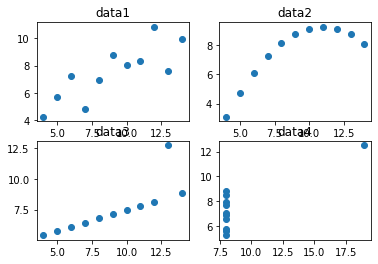

In [ ]:
ax1.set_title('data1')
ax2.set_title('data2')
ax3.set_title('data3')
ax4.set_title('data4')

fig

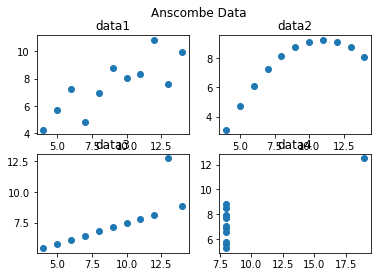

In [ ]:
fig.suptitle('Anscombe Data')
fig

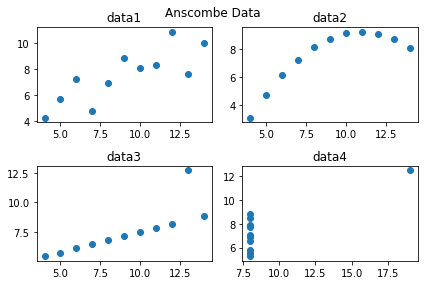

In [ ]:
fig.tight_layout()
fig

In [ ]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


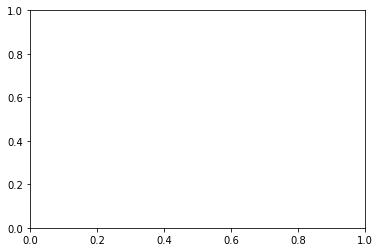

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

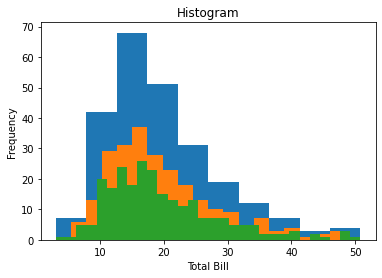

In [ ]:
ax1.hist(tips['total_bill'], bins=30)

ax1.set_title('Histogram')
ax1.set_xlabel('Total Bill')
ax1.set_ylabel('Frequency')

fig

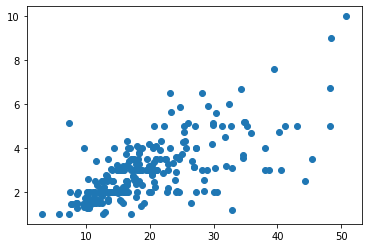

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(tips['total_bill'], tips['tip'])

In [ ]:
def recode_sex(x):
  if x == 'Female':
    return 0
  else:
    return 1

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips['sex_color'] = tips['sex'].apply(recode_sex)
tips

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


Text(0, 0.5, 'Tip')

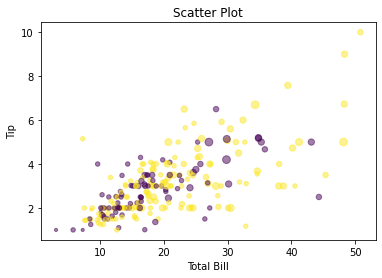

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(x = tips['total_bill'], y = tips['tip'], s = tips['size'] * 10, c = tips['sex_color'], alpha = 0.5)

ax1.set_title('Scatter Plot')
ax1.set_xlabel('Total Bill')
ax1.set_ylabel('Tip')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

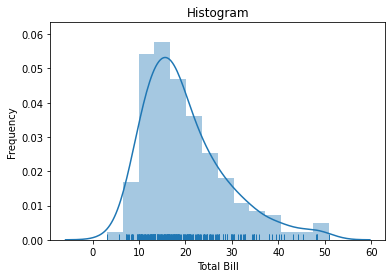

In [ ]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug = True)
ax.set_title('Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


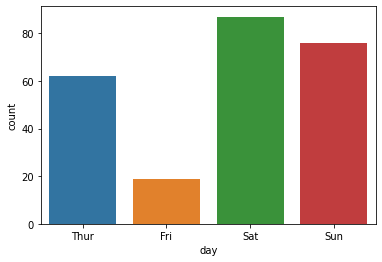

In [ ]:
sns.countplot('day', data = tips)

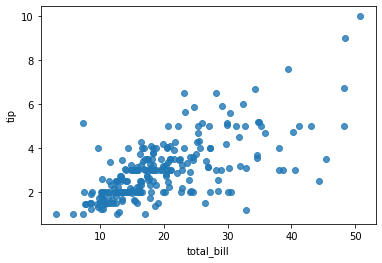

In [ ]:
sns.regplot(x = 'total_bill', y = 'tip', data=tips, fit_reg=False)

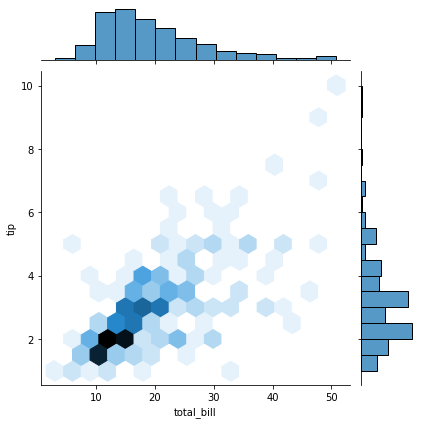

In [ ]:
sns.jointplot(x = 'total_bill', y = 'tip', data=tips, kind = 'hex')

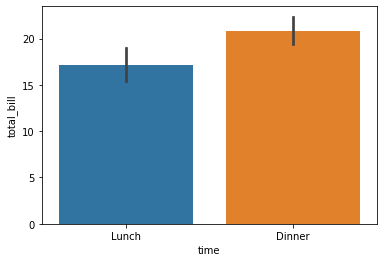

In [ ]:
sns.barplot(x = 'time', y = 'total_bill', data=tips)

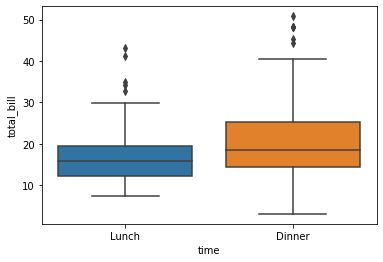

In [ ]:
sns.boxplot(x = 'time', y = 'total_bill', data=tips)

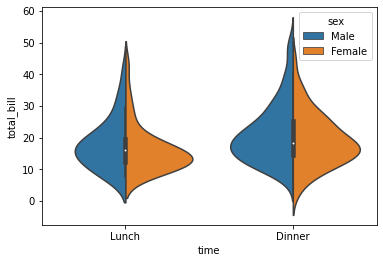

In [ ]:
sns.violinplot(x = 'time', y = 'total_bill', data=tips, hue = 'sex', split = True)

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


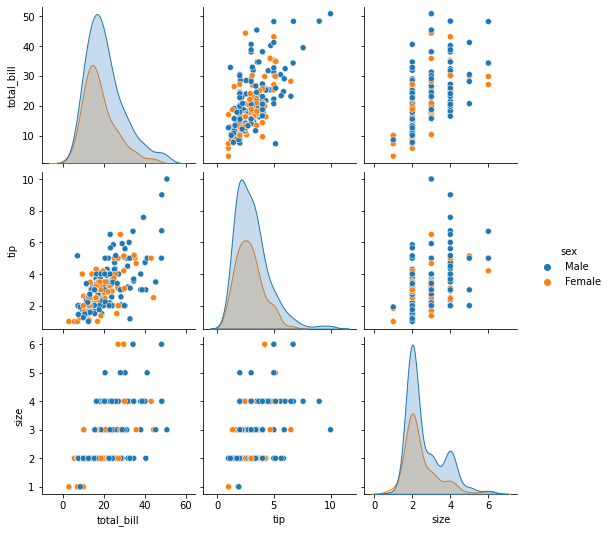

In [ ]:
sns.pairplot(tips, hue = 'sex')

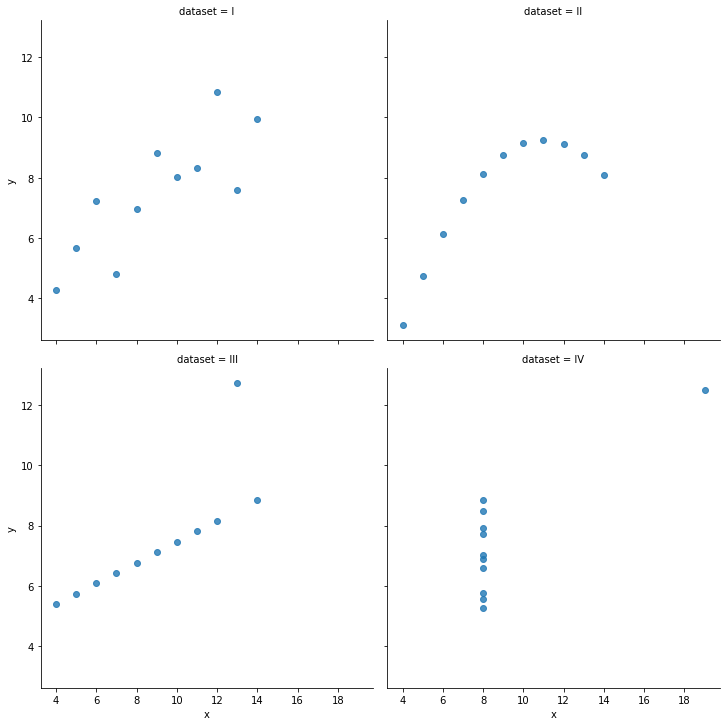

In [ ]:
anscombe = sns.load_dataset('anscombe')
sns.lmplot(x = 'x', y = 'y', data = anscombe, fit_reg=False, col = 'dataset', col_wrap = 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

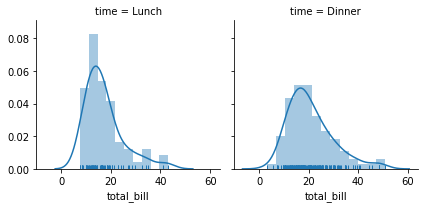

In [ ]:
facet = sns.FacetGrid(tips, col = 'time')
facet.map(sns.distplot, 'total_bill', rug=True)

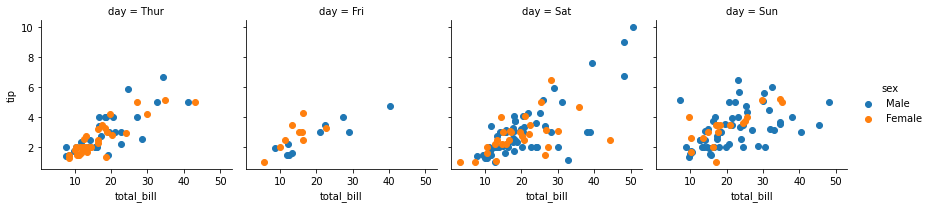

In [ ]:
import matplotlib.pyplot as plt

facet = sns.FacetGrid(tips, col = 'day', hue = 'sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

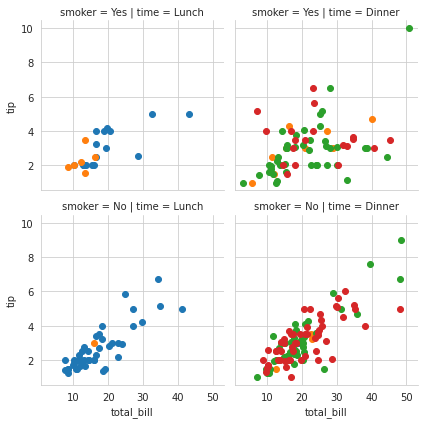

In [ ]:
sns.set_style('whitegrid')
facet = sns.FacetGrid(tips, col = 'time', hue = 'day', row = 'smoker')
facet.map(plt.scatter, 'total_bill', 'tip')